<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Première-exploration-des-données" data-toc-modified-id="Première-exploration-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Première exploration des données</a></span></li><li><span><a href="#Selection-des-catégories" data-toc-modified-id="Selection-des-catégories-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Selection des catégories</a></span><ul class="toc-item"><li><span><a href="#Âge-du-bâtiment" data-toc-modified-id="Âge-du-bâtiment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Âge du bâtiment</a></span></li><li><span><a href="#Type-du-bâtiment" data-toc-modified-id="Type-du-bâtiment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Type du bâtiment</a></span></li><li><span><a href="#Surface" data-toc-modified-id="Surface-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Surface</a></span></li><li><span><a href="#Surface-sans-compter-le-parking" data-toc-modified-id="Surface-sans-compter-le-parking-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Surface sans compter le parking</a></span></li><li><span><a href="#Surface-de-la-première-utilité-du-bâtiment" data-toc-modified-id="Surface-de-la-première-utilité-du-bâtiment-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Surface de la première utilité du bâtiment</a></span></li><li><span><a href="#Utilisation-première-du-bâtiment" data-toc-modified-id="Utilisation-première-du-bâtiment-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Utilisation première du bâtiment</a></span></li></ul></li><li><span><a href="#Dataframe-utilisé-pour-les-regressions" data-toc-modified-id="Dataframe-utilisé-pour-les-regressions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataframe utilisé pour les regressions</a></span></li><li><span><a href="#Encodage-des-valeurs-catégorielles." data-toc-modified-id="Encodage-des-valeurs-catégorielles.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encodage des valeurs catégorielles.</a></span><ul class="toc-item"><li><span><a href="#Variable-Structurelle" data-toc-modified-id="Variable-Structurelle-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Variable Structurelle</a></span></li></ul></li><li><span><a href="#Transformation-logarithmique" data-toc-modified-id="Transformation-logarithmique-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transformation logarithmique</a></span></li><li><span><a href="#Traitement-des-outliers-sur-les-valeurs-surface" data-toc-modified-id="Traitement-des-outliers-sur-les-valeurs-surface-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Traitement des outliers sur les valeurs surface</a></span></li><li><span><a href="#Imputation" data-toc-modified-id="Imputation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Imputation</a></span></li></ul></div>

# Projet 4: Anticipez les besoins en consommation de bâtiments

# P4: Notebook de nettoyage

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pprint import pprint
from scipy import stats
from matplotlib import pyplot
import warnings
warnings.simplefilter("ignore", FutureWarning)

In [5]:
from missingpy import MissForest
from timeit import default_timer as timer
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [6]:
def Z_Score_processing(dataframe_original):
    dataframe = dataframe_original
    liste_dropped = []
    if type(dataframe) == pd.Series:
        zScore = pd.Series(np.abs(
            stats.zscore(dataframe[~dataframe.isna()])),
            index=dataframe.index)

        zScore_index = zScore[zScore > 3].index
        print("Nombre d'outliers enlevés:")
        pprint(len(zScore_index))
        print('\n')
        liste_dropped.append(zScore_index)
        dataframe = dataframe.drop(dataframe.loc[zScore_index].index)
    else:
        for colonnes in dataframe.columns:
            zScore = pd.Series(np.abs(
                stats.zscore(dataframe[~dataframe[colonnes].isna()][colonnes])),
                index=dataframe.index)

            zScore_index = zScore[zScore > 3].index
            print("Nombre d'outliers enlevés pour la colonne", colonnes, ":")
            pprint(len(zScore_index))
            print('\n')
            liste_dropped.append(zScore_index)
            dataframe = dataframe.drop(dataframe.loc[zScore_index].index)
    return liste_dropped

## Première exploration des données

In [7]:
df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJET 4/2016_Building_Energy_Benchmarking.csv")

<AxesSubplot:>

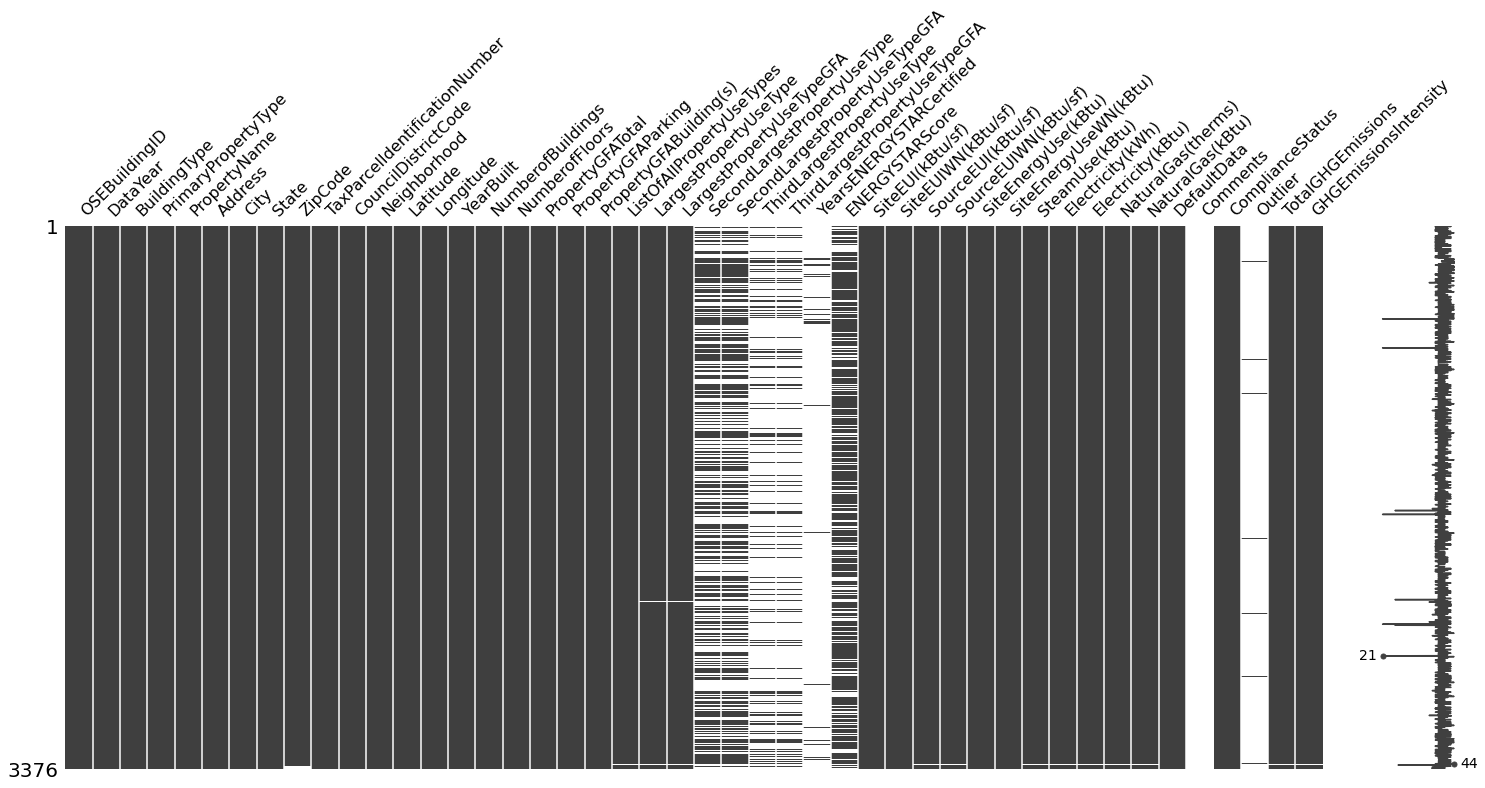

In [8]:
import missingno as msno

msno.matrix(df)

Le dataframe est composé de 3376 lignes, de 46 colonne. 

In [9]:
df.drop(columns=["GHGEmissionsIntensity", "Comments"]).describe().T.style.background_gradient(
    subset=["mean"], cmap="coolwarm"
).background_gradient(subset=["std"], cmap="coolwarm").background_gradient(
    subset=["50%"], cmap="coolwarm"
)

,count,mean,std,min,25%,50%,75%,max
OSEBuildingID,3376.000000,21208.991114,12223.757015,1.000000,19990.750000,23112.000000,25994.250000,50226.000000
DataYear,3376.000000,2016.000000,0.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
ZipCode,3360.000000,98116.949107,18.615205,98006.000000,98105.000000,98115.000000,98122.000000,98272.000000
CouncilDistrictCode,3376.000000,4.439277,2.120625,1.000000,3.000000,4.000000,7.000000,7.000000
Latitude,3376.000000,47.624033,0.047758,47.499170,47.599860,47.618675,47.657115,47.733870
Longitude,3376.000000,-122.334795,0.027203,-122.414250,-122.350662,-122.332495,-122.319407,-122.220966
YearBuilt,3376.000000,1968.573164,33.088156,1900.000000,1948.000000,1975.000000,1997.000000,2015.000000
NumberofBuildings,3368.000000,1.106888,2.108402,0.000000,1.000000,1.000000,1.000000,111.000000
NumberofFloors,3376.000000,4.709123,5.494465,0.000000,2.000000,4.000000,5.000000,99.000000
PropertyGFATotal,3376.000000,94833.537322,218837.607120,11285.000000,28487.000000,44175.000000,90992.000000,9320156.000000


In [12]:
df.isna().mean().sort_values(ascending=False)

Comments                           1.000000
Outlier                            0.990521
YearsENERGYSTARCertified           0.964751
ThirdLargestPropertyUseType        0.823460
ThirdLargestPropertyUseTypeGFA     0.823460
SecondLargestPropertyUseType       0.502666
SecondLargestPropertyUseTypeGFA    0.502666
ENERGYSTARScore                    0.249704
LargestPropertyUseTypeGFA          0.005924
LargestPropertyUseType             0.005924
ZipCode                            0.004739
ListOfAllPropertyUseTypes          0.002666
SourceEUIWN(kBtu/sf)               0.002666
SourceEUI(kBtu/sf)                 0.002666
Electricity(kWh)                   0.002666
Electricity(kBtu)                  0.002666
NaturalGas(therms)                 0.002666
NaturalGas(kBtu)                   0.002666
TotalGHGEmissions                  0.002666
SteamUse(kBtu)                     0.002666
GHGEmissionsIntensity              0.002666
NumberofBuildings                  0.002370
SiteEUI(kBtu/sf)                

La majorité des colonnes sont remplies, mis à part :
- Outliers
- Comments
- SecondLargestPropertyUseType       
- SecondLargestPropertyUseTypeGFA    
- ThirdLargestPropertyUseType        
- ThirdLargestPropertyUseTypeGFA    
- YearsENERGYSTARCertified           

In [13]:
df[["PrimaryPropertyType", "BuildingType"]].describe().T

,count,unique,top,freq
PrimaryPropertyType,3376,24,Low-Rise Multifamily,987
BuildingType,3376,8,NonResidential,1460


In [14]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


Il y a plusieurs unités différentes pour la plupart des mesures énergétiques, et que très peu de valeurs négatives ou évidemment aberrantes.


In [15]:
df.duplicated().value_counts()

False    3376
dtype: int64

Il n'y a aucune valeur doublon.

## Selection des catégories

### Âge du bâtiment

La première catégorie que nous choisissons est l'âge du bâtiment.

In [17]:
df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
df['BuildingAge'] = df['BuildingAge']/max(df['BuildingAge'])
display(df[['BuildingAge', 'DataYear', 'YearBuilt']])

,BuildingAge,DataYear,YearBuilt
0,0.767241,2016,1927
1,0.172414,2016,1996
2,0.405172,2016,1969
3,0.775862,2016,1926
4,0.310345,2016,1980
...,...,...,...
3371,0.224138,2016,1990
3372,0.103448,2016,2004
3373,0.362069,2016,1974
3374,0.232759,2016,1989


In [18]:
df = df.drop(['DataYear', 'YearBuilt'], axis=1)

### Type du bâtiment

In [19]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

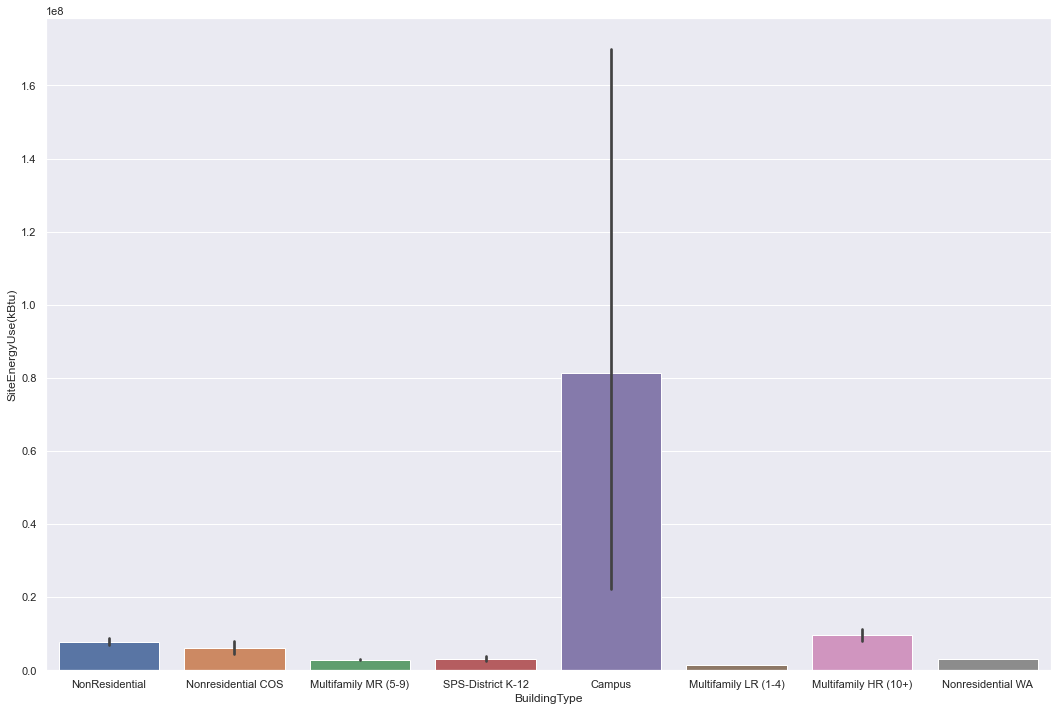

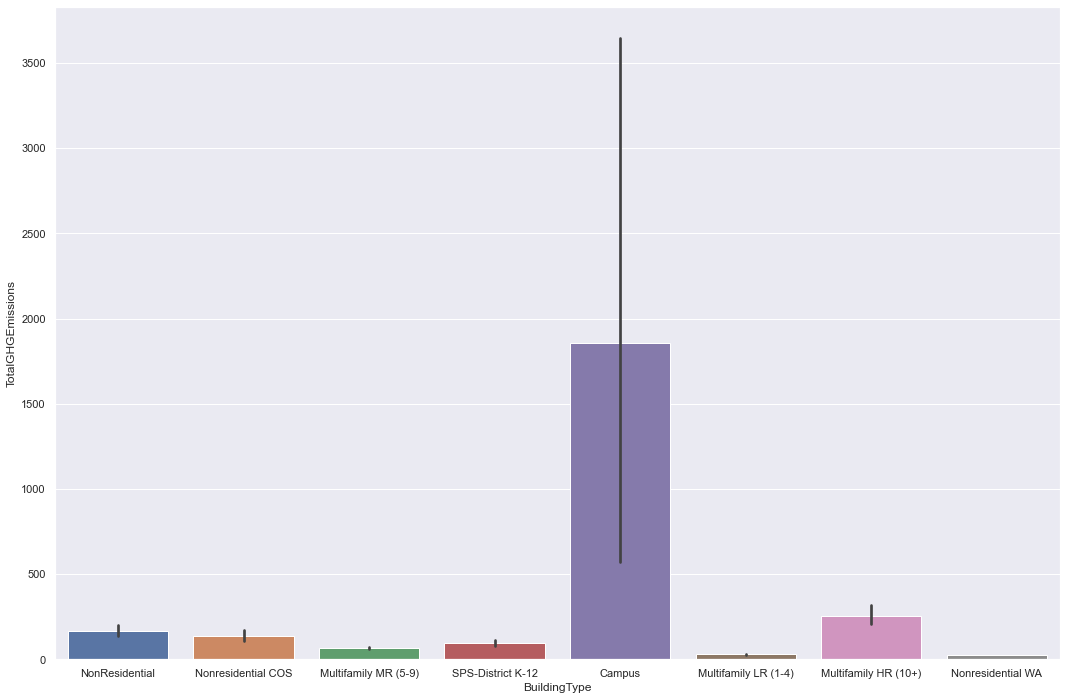

In [20]:
sns.set(rc={"figure.figsize": (18, 12)})
for feature in ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]:

    sns.barplot(data=df, y=feature, x="BuildingType")
    plt.show()

Nous trouvons un outlier parmis les bâtiments du type Campus. 

In [21]:
df.loc[df["BuildingType"] == "Campus", "PropertyGFATotal"]

35       494835
105      441071
128      694072
162      334368
195      215476
289      137400
301      258497
340      535947
661       22800
954       21500
1297      49280
1300      45500
1301      25380
1494    2200000
1692      57952
1732     138907
1862     260241
1993     230971
2270      46100
2325     537000
2993     109794
3022      30562
3252     149856
3274    9320156
Name: PropertyGFATotal, dtype: int64

In [22]:
df = df.drop([3274, 1494])

### Surface 

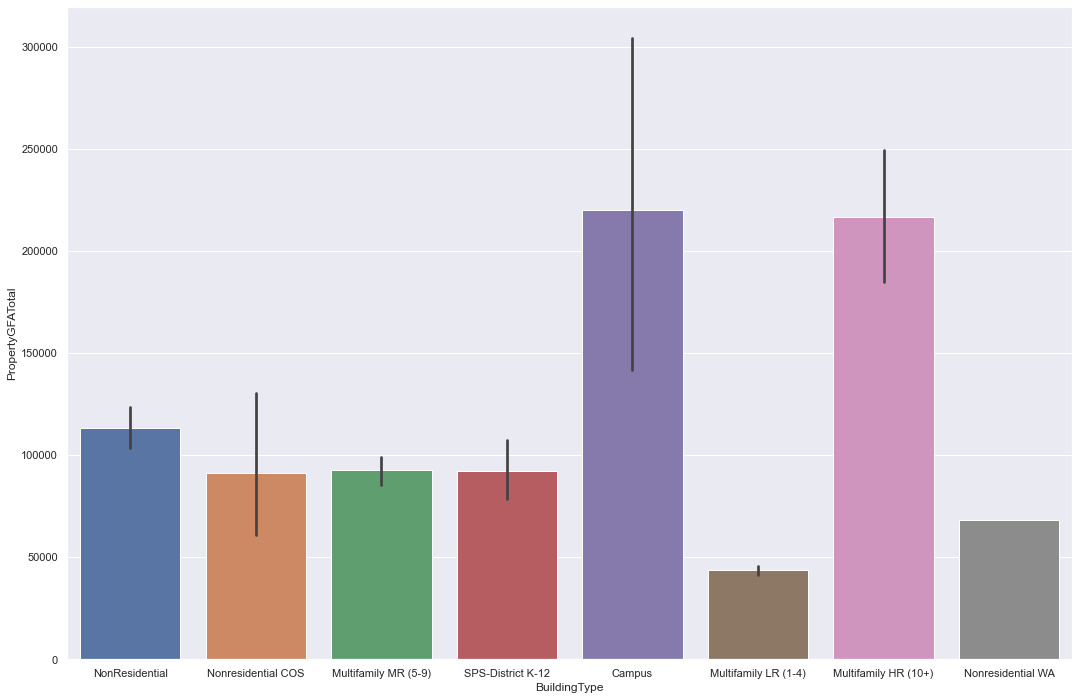

In [23]:
sns.barplot(data=df, y="PropertyGFATotal", x="BuildingType")
plt.show()

### Surface sans compter le parking

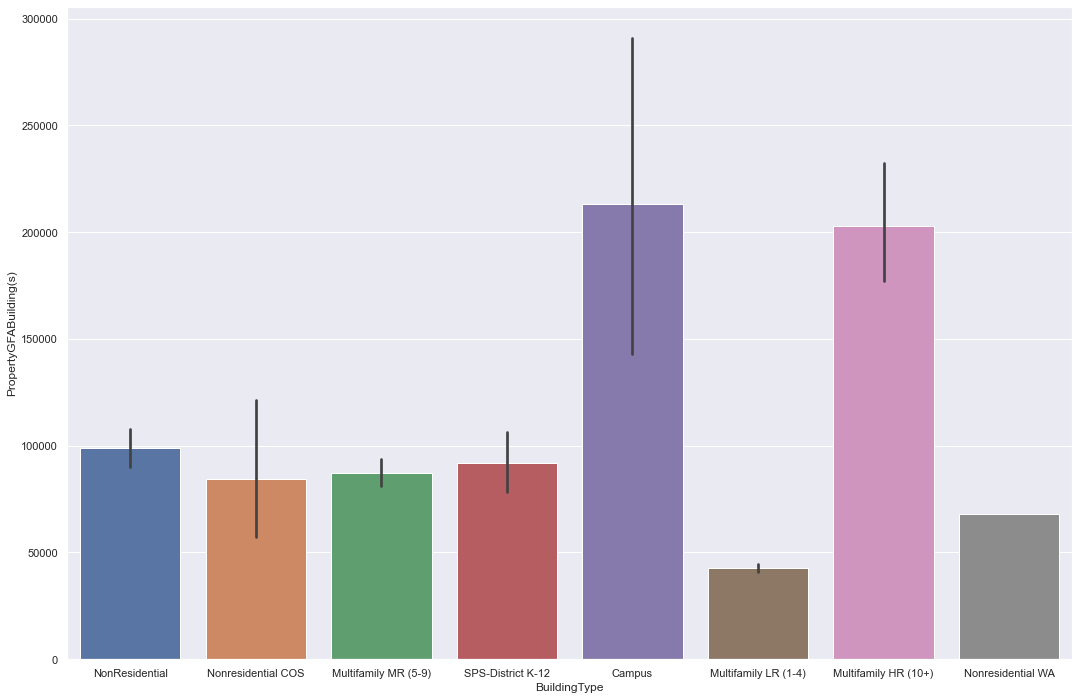

In [24]:
sns.barplot(data=df, y="PropertyGFABuilding(s)", x="BuildingType")
plt.show()

### Surface de la première utilité du bâtiment

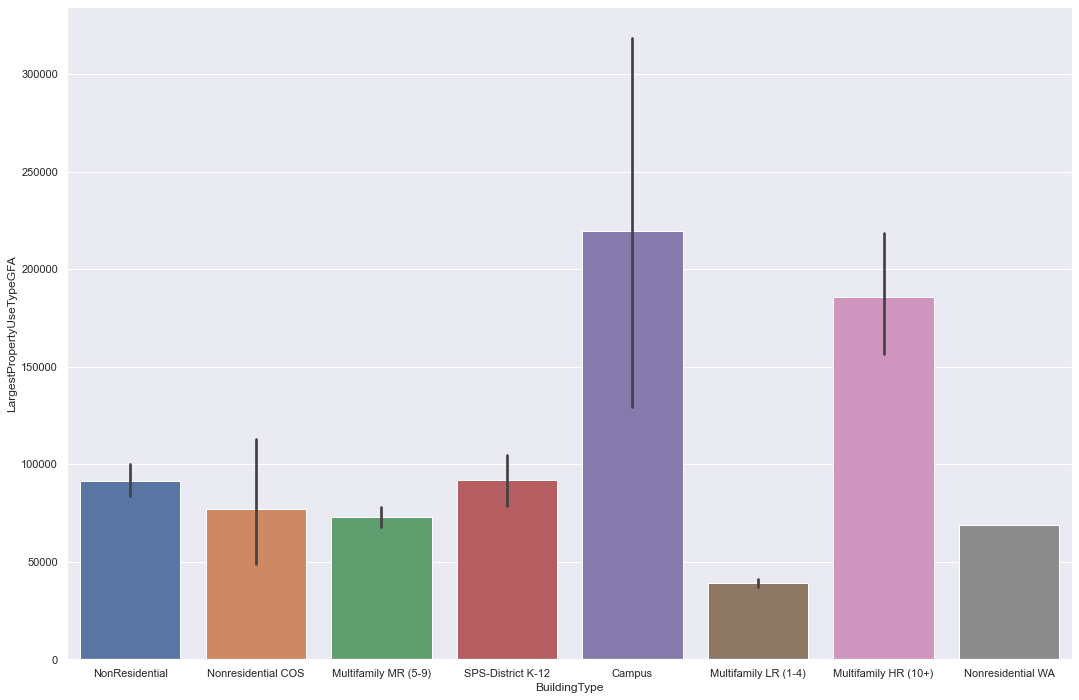

In [25]:
sns.barplot(data=df, y="LargestPropertyUseTypeGFA", x="BuildingType")
plt.show()

### Utilisation première du bâtiment

In [26]:
df["PrimaryPropertyType"].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

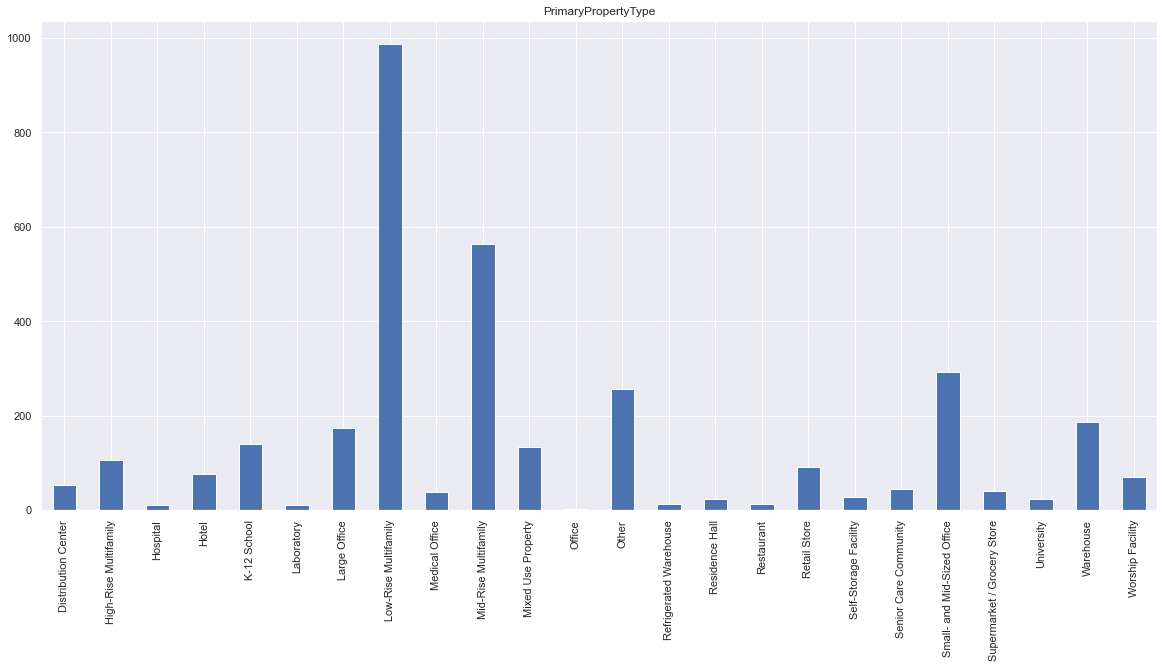

In [27]:
fig = plt.figure(figsize=(20, 9))
df["PrimaryPropertyType"].value_counts().sort_index(axis=0).plot(kind='bar')
plt.title("PrimaryPropertyType")
plt.show()

## Dataframe utilisé pour les regressions

Les deux valeurs que nous cherchons à prédire sont de grandes amplitudes, nous appliquons une transformation logarithmique pour essayer de normaliser celles-ci.

In [28]:
y_energy = df["SiteEnergyUseWN(kBtu)"]
y_energy = y_energy[y_energy != 0]
y_energy.dropna(inplace=True)
y_energy = abs(y_energy)
y_energy = np.log(y_energy)

liste_dropped = Z_Score_processing(y_energy)
y_energy.describe()

Nombre d'outliers enlevés:
23




count    3340.000000
mean       14.630750
std         1.141433
min         9.503681
25%        13.805652
50%        14.470125
75%        15.301086
max        19.971671
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [29]:
y_emissions = df["TotalGHGEmissions"]
y_emissions = y_emissions[y_emissions != 0]
y_emissions.dropna(inplace=True)
y_emissions = abs(y_emissions)
y_emissions = np.log(y_emissions)

liste_dropped = Z_Score_processing(y_emissions)
y_emissions.describe()

Nombre d'outliers enlevés:
14




count    3356.000000
mean        3.499479
std         1.503837
min        -2.407946
25%         2.263582
50%         3.527096
75%         4.543428
max         9.733350
Name: TotalGHGEmissions, dtype: float64

In [30]:
features = ["BuildingAge",
            "BuildingType",
            "PropertyGFATotal",
            "PropertyGFABuilding(s)",
            "LargestPropertyUseTypeGFA",
            "PrimaryPropertyType",
            "SteamUse(kBtu)",
            "NaturalGas(kBtu)",
            "Electricity(kBtu)"]

## Encodage des valeurs catégorielles.

Pour les valeurs "BuildingType", et "PrimaryPropertyType", nous procédons à un One-Hot-Encode.

### Variable Structurelle

Depuis les mesures effectuées sur les bâtiments, nous pouvons déduire de leur accès à certaines ressources, comme le gaz naturel, la vapeur, ou l'électricité. Puisque l'objectif est d'éviter de prochaine mesure, nous nous contenterons de vérifier sur un bâtiment utilise ou non le gaz naturel, ainsi que la vapeur, et l'électricité.

In [31]:
index_SteamNotUsed = df[df["SteamUse(kBtu)"] == 0.].index
index_SteamUsed = df[df["SteamUse(kBtu)"] > 0.].index

In [32]:
df.loc[index_SteamNotUsed, ["SteamUse(kBtu)"]] = 0.
df.loc[index_SteamUsed, ["SteamUse(kBtu)"]] = 1.

In [33]:
df["SteamUse"] = df["SteamUse(kBtu)"]
df = df.drop(columns=["SteamUse(kBtu)"])

In [34]:
index_NaturalGasNotUsed = df[df["NaturalGas(kBtu)"] == 0.].index
index_NaturalGasUsed = df[df["NaturalGas(kBtu)"] > 0.].index


df.loc[index_NaturalGasNotUsed, ["NaturalGas(kBtu)"]] = 0.
df.loc[index_NaturalGasUsed, ["NaturalGas(kBtu)"]] = 1.


df["NaturalGasUse"] = df["NaturalGas(kBtu)"]
df = df.drop(columns=["NaturalGas(kBtu)"])

In [35]:
index_ElectricityNotUsed = df[df["Electricity(kBtu)"] == 0.].index
index_ElectricityUsed = df[df["Electricity(kBtu)"] != 0.].index


df.loc[index_NaturalGasNotUsed, ["Electricity(kBtu)"]] = 0.
df.loc[index_NaturalGasUsed, ["Electricity(kBtu)"]] = 1.


df["ElectricityUse"] = df["Electricity(kBtu)"]
df = df.drop(columns=["Electricity(kBtu)"])

In [36]:
df[["ElectricityUse", "NaturalGasUse", "SteamUse"]].describe().T

,count,mean,std,min,25%,50%,75%,max
ElectricityUse,3365.0,0.626449,0.483818,0.0,0.0,1.0,1.0,1.0
NaturalGasUse,3365.0,0.626449,0.483818,0.0,0.0,1.0,1.0,1.0
SteamUse,3365.0,0.038336,0.192034,0.0,0.0,0.0,0.0,1.0


In [37]:
df["ENERGYSTARScore"] = df["ENERGYSTARScore"]/100

In [38]:
features = ["BuildingAge",
            "BuildingType",
            "PropertyGFATotal",
            "PropertyGFABuilding(s)",
            "LargestPropertyUseTypeGFA",
            "PrimaryPropertyType",
            "SteamUse",
            "NaturalGasUse",
            "ElectricityUse",
            "ENERGYSTARScore"]

In [39]:
df_energy = df.loc[y_energy.index]
df_emissions = df.loc[y_emissions.index]

df_energy = df_energy[features]
df_emissions = df_emissions[features]

In [40]:
def Encoding(df, feature):

    df_encoding = pd.get_dummies(df[[feature]], prefix='T')

    df = pd.concat([df, df_encoding], axis=1)

    df = df.drop(columns=[feature])
    return df


df_energy = Encoding(df_energy, "PrimaryPropertyType")
df_energy = Encoding(df_energy, "BuildingType")
df_emissions = Encoding(df_emissions, "PrimaryPropertyType")
df_emissions = Encoding(df_emissions, "BuildingType")

## Transformation logarithmique

Ces quantités sont de grandes amplitudes, nous passons au logarithme.

In [41]:
df_emissions[[
    "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"
]] = np.log(df_emissions[[
    "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"
]])
df_emissions[
    "PropertyGFATotal"] = df_emissions[
    "PropertyGFATotal"]/max(df_emissions[
        "PropertyGFATotal"])
df_emissions[
    "PropertyGFABuilding(s)"] = df_emissions[
    "PropertyGFABuilding(s)"]/max(df_emissions[
        "PropertyGFABuilding(s)"])
df_emissions[
    "LargestPropertyUseTypeGFA"] = df_emissions[
    "LargestPropertyUseTypeGFA"]/max(df_emissions[
        "LargestPropertyUseTypeGFA"])

df_energy[[
    "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"
]] = np.log(df_energy[[
    "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"
]])

df_energy[
    "PropertyGFATotal"] = df_energy[
    "PropertyGFATotal"]/max(df_energy[
        "PropertyGFATotal"])
df_energy[
    "PropertyGFABuilding(s)"] = df_energy[
    "PropertyGFABuilding(s)"]/max(df_energy[
        "PropertyGFABuilding(s)"])
df_energy[
    "LargestPropertyUseTypeGFA"] = df_energy[
    "LargestPropertyUseTypeGFA"]/max(df_energy[
        "LargestPropertyUseTypeGFA"])

In [42]:
df_energy[df_energy.columns[:3]].describe().T.style.background_gradient(
    subset=["mean"], cmap="coolwarm"
).background_gradient(subset=["std"], cmap="coolwarm").background_gradient(
    subset=["50%"], cmap="coolwarm"
)

,count,mean,std,min,25%,50%,75%,max
BuildingAge,3340.000000,0.408825,0.285537,0.008621,0.163793,0.353448,0.586207,1.000000
PropertyGFATotal,3340.000000,0.754311,0.059207,0.644223,0.707917,0.738140,0.787623,1.000000
PropertyGFABuilding(s),3340.000000,0.755898,0.057183,0.569975,0.710993,0.741819,0.788294,1.000000


In [43]:
pd.DataFrame(y_emissions).describe().T.style

,count,mean,std,min,25%,50%,75%,max
TotalGHGEmissions,3356.000000,3.499479,1.503837,-2.407946,2.263582,3.527096,4.543428,9.733350


## Traitement des outliers sur les valeurs surface

In [44]:
Z_Score_processing(df_emissions[[
    "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"
]])


Z_Score_processing(df_energy[[
    "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"
]])

Nombre d'outliers enlevés pour la colonne PropertyGFATotal :
33


Nombre d'outliers enlevés pour la colonne PropertyGFABuilding(s) :
19


Nombre d'outliers enlevés pour la colonne LargestPropertyUseTypeGFA :
11


Nombre d'outliers enlevés pour la colonne PropertyGFATotal :
33


Nombre d'outliers enlevés pour la colonne PropertyGFABuilding(s) :
21


Nombre d'outliers enlevés pour la colonne LargestPropertyUseTypeGFA :
13




[Int64Index([   2,   49,   77,  124,  155,  158,  166,  170,  206,  207,  212,
              214,  221,  227,  229,  230,  233,  271,  273,  285,  292,  293,
              302,  477,  490,  559,  564,  577,  618, 1153, 1296, 2314, 2530],
            dtype='int64'),
 Int64Index([  20,   36,   72,  121,  128,  167,  205,  261,  262,  340,  507,
              733, 1109, 1418, 1690, 2325, 2595, 2835, 3162, 3183, 3286],
            dtype='int64'),
 Int64Index([35, 105, 222, 225, 231, 239, 808, 1453, 1672, 1738, 3168, 3261,
             3264],
            dtype='int64')]

Suite au Z-Score il nous faut retrouver les mêmes dimensions sur tous les tableau.

In [45]:
y_emissions = y_emissions.loc[df_emissions.index]
y_energy = y_energy.loc[df_energy.index]

## Imputation

Il existe quelques valeurs manquantes, l'algorithme MissForest est très performant pour ce genre de tâche, et rapide d'exécution.

In [46]:
from missingpy import MissForest
imputer = MissForest()
imputer = imputer.fit(df_energy)
imputer = imputer.transform(df_energy)
df_energy = pd.DataFrame(
    imputer, columns=df_energy.columns, index=df_energy.index)


imputer = MissForest()
imputer = imputer.fit(df_emissions)
imputer = imputer.transform(df_emissions)
df_emissions = pd.DataFrame(
    imputer, columns=df_emissions.columns, index=df_emissions.index)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2


In [47]:
df_emissions.describe()

,BuildingAge,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SteamUse,NaturalGasUse,ElectricityUse,ENERGYSTARScore,T_Distribution Center,T_High-Rise Multifamily,...,T_Warehouse,T_Worship Facility,T_Campus,T_Multifamily HR (10+),T_Multifamily LR (1-4),T_Multifamily MR (5-9),T_NonResidential,T_Nonresidential COS,T_Nonresidential WA,T_SPS-District K-12
count,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,...,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000
mean,0.408725,0.754631,0.756200,0.751071,0.038439,0.628129,0.628129,0.667231,0.015793,0.031287,...,0.055721,0.021156,0.006555,0.032777,0.300358,0.172825,0.433552,0.025328,0.000298,0.028308
std,0.285298,0.059325,0.057284,0.058920,0.192281,0.483376,0.483376,0.241560,0.124691,0.174119,...,0.229417,0.143926,0.080712,0.178079,0.458482,0.378152,0.495639,0.157142,0.017262,0.165875
min,0.008621,0.644223,0.569975,0.602759,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.163793,0.708094,0.711190,0.706632,0.000000,0.000000,0.000000,0.540000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.353448,0.738504,0.742081,0.739014,0.000000,1.000000,1.000000,0.697550,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.586207,0.788411,0.788584,0.783606,0.000000,1.000000,1.000000,0.860000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_energy.describe()

,BuildingAge,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SteamUse,NaturalGasUse,ElectricityUse,ENERGYSTARScore,T_Distribution Center,T_High-Rise Multifamily,...,T_Warehouse,T_Worship Facility,T_Campus,T_Multifamily HR (10+),T_Multifamily LR (1-4),T_Multifamily MR (5-9),T_NonResidential,T_Nonresidential COS,T_Nonresidential WA,T_SPS-District K-12
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,...,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,0.408825,0.754311,0.755898,0.750704,0.038024,0.629341,0.629341,0.666497,0.015868,0.031138,...,0.055988,0.020659,0.006587,0.032635,0.303293,0.173353,0.433234,0.025449,0.000299,0.025150
std,0.285537,0.059207,0.057183,0.058823,0.191283,0.483054,0.483054,0.242071,0.124985,0.173716,...,0.229933,0.142260,0.080904,0.177705,0.459750,0.378609,0.495596,0.157508,0.017303,0.156603
min,0.008621,0.644223,0.569975,0.602759,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.163793,0.707917,0.710993,0.706489,0.000000,0.000000,0.000000,0.540000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.353448,0.738140,0.741819,0.738361,0.000000,1.000000,1.000000,0.696850,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.586207,0.787623,0.788294,0.783169,0.000000,1.000000,1.000000,0.860000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nous avons deux dataframes, préparés pour future analyse et model building. Il n'y a aucune valeur manquante, et aucune entrée catégorielle.

In [ ]:
df_emissions.to_csv("df_emissions.csv")
df_energy.to_csv("df_energy.csv")
y_emissions.to_csv("y_emissions.csv")
y_energy.to_csv("y_energy.csv")